# Pipeline Implementation of Decision Trees

You already have the credit card fraud detection dataset. Upload the dataset in you S3 bucket and use the same for this implementation.

# Load Data

In [1]:
#Create a spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('proj').getOrCreate()

VBox()

Starting Spark application


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
#Load the data from s3 bucket.
data = spark.read.csv('s3a://decisiontreespark/fraud_detection_data.csv',inferSchema=True,header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
#print the schema for data
data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- step: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: double (nullable = true)
 |-- nameOrig: string (nullable = true)
 |-- oldbalanceOrg: double (nullable = true)
 |-- newbalanceOrig: double (nullable = true)
 |-- nameDest: string (nullable = true)
 |-- oldbalanceDest: double (nullable = true)
 |-- newbalanceDest: double (nullable = true)
 |-- isFraud: integer (nullable = true)
 |-- isFlaggedFraud: integer (nullable = true)

In [4]:
#Select the required columns
sel_cols = ['step', 'type', 'amount', 
            'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
            'newbalanceDest', 'isFraud', 'isFlaggedFraud']

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
#Create a dataframe from selected columns
df=data.select(sel_cols)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
#View the dataframe
df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+--------+---------+-------------+--------------+--------------+--------------+-------+--------------+
|step|    type|   amount|oldbalanceOrg|newbalanceOrig|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+---------+-------------+--------------+--------------+--------------+-------+--------------+
|   1| PAYMENT|  9839.64|     170136.0|     160296.36|           0.0|           0.0|      0|             0|
|   1| PAYMENT|  1864.28|      21249.0|      19384.72|           0.0|           0.0|      0|             0|
|   1|TRANSFER|    181.0|        181.0|           0.0|           0.0|           0.0|      1|             0|
|   1|CASH_OUT|    181.0|        181.0|           0.0|       21182.0|           0.0|      1|             0|
|   1| PAYMENT| 11668.14|      41554.0|      29885.86|           0.0|           0.0|      0|             0|
|   1| PAYMENT|  7817.71|      53860.0|      46042.29|           0.0|           0.0|      0|             0|
|   1| PAYMENT|  7107.77|   

# Pipelined code

The Flow chart below represents the pipeline code and how it is implemented. Use this flow chart to understand the code and implement it on your own.

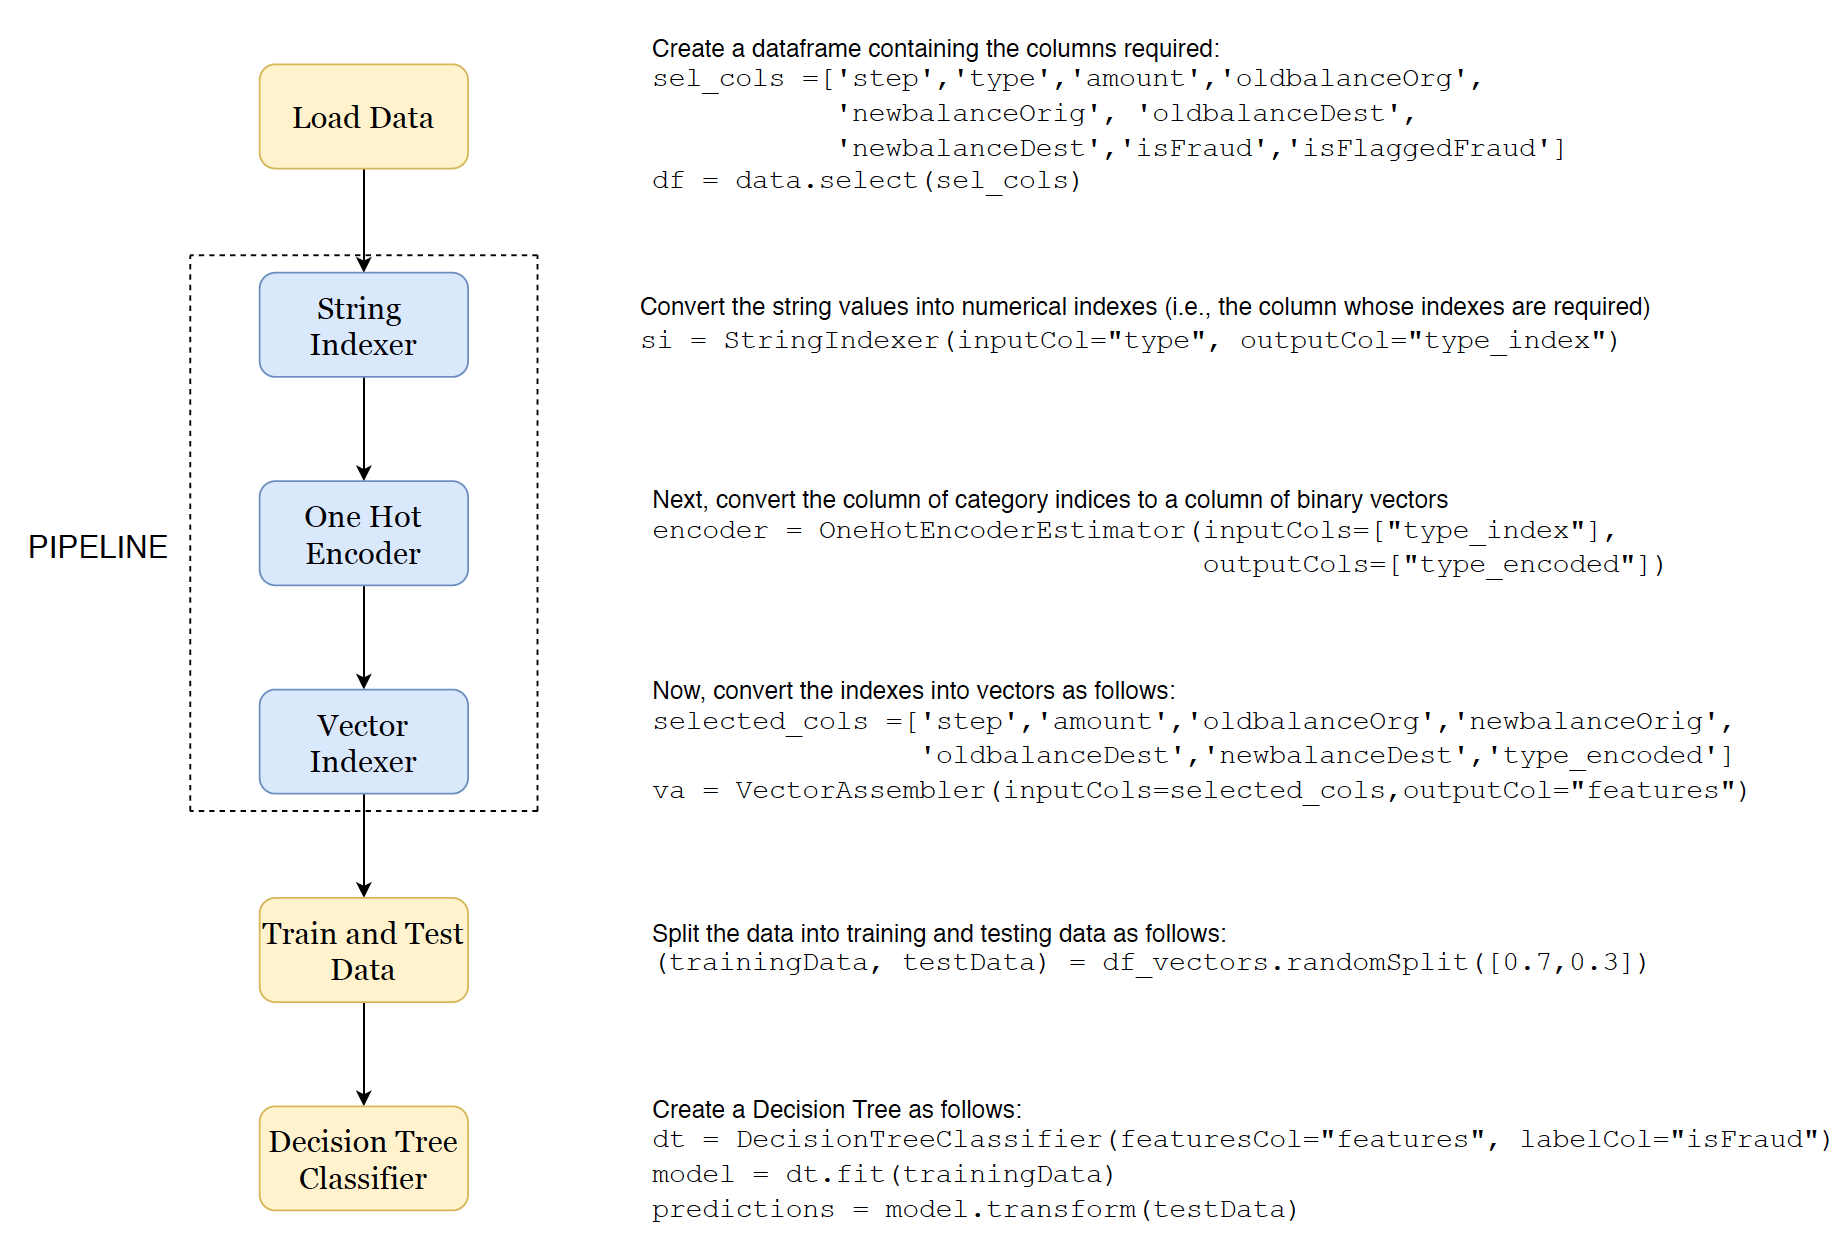

In [7]:
#import the libraries for StringIndexer, OneHotEncoderEstimator, VectorAssembler and Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator, VectorAssembler
from pyspark.ml import Pipeline

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
#Write the code for StringIndexer, OneHotEncoderEstimator and VectorAssembler 
si = StringIndexer(inputCol='type', outputCol='type11')
ohe = OneHotEncoderEstimator(inputCols=['type11'], outputCols=['type_encoded'])
assembler = VectorAssembler(inputCols= ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','type_encoded'], outputCol='feature')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Create Decision Tree

In [9]:
#Import the library for Decision Tree Classifier
from pyspark.ml.classification import DecisionTreeClassifier

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
#Write the code to run the Decision Tree Classifier function
dt = DecisionTreeClassifier(featuresCol="feature", labelCol="isFraud")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
#Run the pipeline function
pipeline = Pipeline(stages=[si, ohe, assembler,dt])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
#Split the data into training and test data
(trainingData, testData) = df.randomSplit([0.7,0.3])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
#Fit the training data
model = pipeline.fit(trainingData)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
#Tranform the test data
predictions = model.transform(testData)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
#View the predicitons data
predictions.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-------+-------+-------------+--------------+--------------+--------------+-------+--------------+------+-------------+--------------------+----------------+--------------------+----------+
|step|   type| amount|oldbalanceOrg|newbalanceOrig|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|type11| type_encoded|             feature|   rawPrediction|         probability|prediction|
+----+-------+-------+-------------+--------------+--------------+--------------+-------+--------------+------+-------------+--------------------+----------------+--------------------+----------+
|   1|CASH_IN| 911.76|   1335635.48|    1336547.24|       48321.6|      47409.85|      0|             0|   2.0|(4,[2],[1.0])|[1.0,911.76,13356...|[642745.0,144.0]|[0.99977601109989...|       0.0|
|   1|CASH_IN|1076.27|   3538789.28|    3539865.55|      22774.25|      23539.55|      0|             0|   2.0|(4,[2],[1.0])|[1.0,1076.27,3538...|[642745.0,144.0]|[0.99977601109989...|       0.0|
|   1|CASH_IN|2673.6

In [16]:
predictions.select("prediction", "isFraud", "feature").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-------+--------------------+
|prediction|isFraud|             feature|
+----------+-------+--------------------+
|       0.0|      0|[1.0,911.76,13356...|
|       0.0|      0|[1.0,1076.27,3538...|
|       0.0|      0|[1.0,2673.64,7688...|
|       0.0|      0|[1.0,4865.48,7395...|
|       0.0|      0|[1.0,5221.77,1046...|
+----------+-------+--------------------+
only showing top 5 rows

# Accuracy

In [17]:
#Import the library to calculate accuracy
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
#Calculate the accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="isFraud",
                                  predictionCol="prediction",
                                  metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
accuracy

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.9997028221874958

In [20]:
#view the number of predictions which are fraud
predictions.groupby("isFraud").count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------+
|isFraud| count|
+-------+------+
|      1|   150|
|      0|299334|
+-------+------+

In [21]:
#Check the predicition values
predictions.groupby("prediction").count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+------+
|prediction| count|
+----------+------+
|       1.0|   103|
|       0.0|299381|
+----------+------+

In [22]:
#Check the value of AUC curve
AUC = evaluator.evaluate(predictions)
print(AUC)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.9997028221874958

# Visualize the Tree

In [23]:
#Write the code for visualisation
Decision_Tree=model.stages[3]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
#View using toDebugSting() method
print(Decision_Tree.toDebugString)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_5430002cec5b) of depth 5 with 19 nodes
  If (feature 1 <= 977255.745)
   If (feature 9 in {1.0})
    If (feature 5 <= 7.66)
     If (feature 4 <= 8.5)
      If (feature 3 <= 50.71)
       Predict: 1.0
      Else (feature 3 > 50.71)
       Predict: 0.0
     Else (feature 4 > 8.5)
      Predict: 0.0
    Else (feature 5 > 7.66)
     Predict: 0.0
   Else (feature 9 not in {1.0})
    Predict: 0.0
  Else (feature 1 > 977255.745)
   If (feature 2 <= 863771.4650000001)
    Predict: 0.0
   Else (feature 2 > 863771.4650000001)
    If (feature 6 in {0.0})
     If (feature 5 <= 310285.02)
      If (feature 4 <= 8.5)
       Predict: 1.0
      Else (feature 4 > 8.5)
       Predict: 0.0
     Else (feature 5 > 310285.02)
      Predict: 0.0
    Else (feature 6 not in {0.0})
     Predict: 1.0